# Geospatial demand estimation

**Original code:**  [Ariane Millot](https://github.com/ariane-millot), [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Support:** [Martin J. Stringer](), [Andjelka Kerekes](), [Roberto Heredia]()<br />
**Funding:** Climate Compatible Growth Programme, Imperial College <br />

---------------------------


#### Brief overview

This notebook performs three main analytical processes:

- **Part 1**: Generated grid mesh (H3 hexagons) for the area of interest (given input admin boundary)
- **Part 2**: Extract GIS-based attributes (vecror or raster) to the grid
- **Part 3**: Build blocks estimating demand for the different energy vectors

A slightly more detailed description of the processing bits is presented before each part below. <br />


### Import necessary modules

In [1]:
### Activate geospatial_env first

# Numeric
import numpy as np
import pandas as pd

# System
import importlib

# Spatial
import geopandas as gpd

# Mapping / Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns

In [2]:
import config
importlib.reload(config)

INFO: Successfully loaded configuration for Zambia from config.py.
INFO: Successfully loaded configuration for Zambia from config.py.


<module 'config' from 'C:\\Users\\amillot\\PycharmProjects\\EDeMOS\\config.py'>

In [3]:
# Utility and Data Loading Modules
from utils import processing_raster, finalizing_rasters, spatialjoinvectors
from data_loader import load_initial_data
import plotting
importlib.reload(plotting)
from plotting import *

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Part 1. Create base grid with H3

COUNTRY
EPSG:4326
Creating a buffer to ensure full hexagon coverage...
Buffer created successfully.
Clipping hexagons and attaching region attributes...
Index(['geometry', 'h3_index', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'NAME_1',
       'id'],
      dtype='object')
Map saved to C:\Users\amillot\PycharmProjects\EDeMOS\Outputs


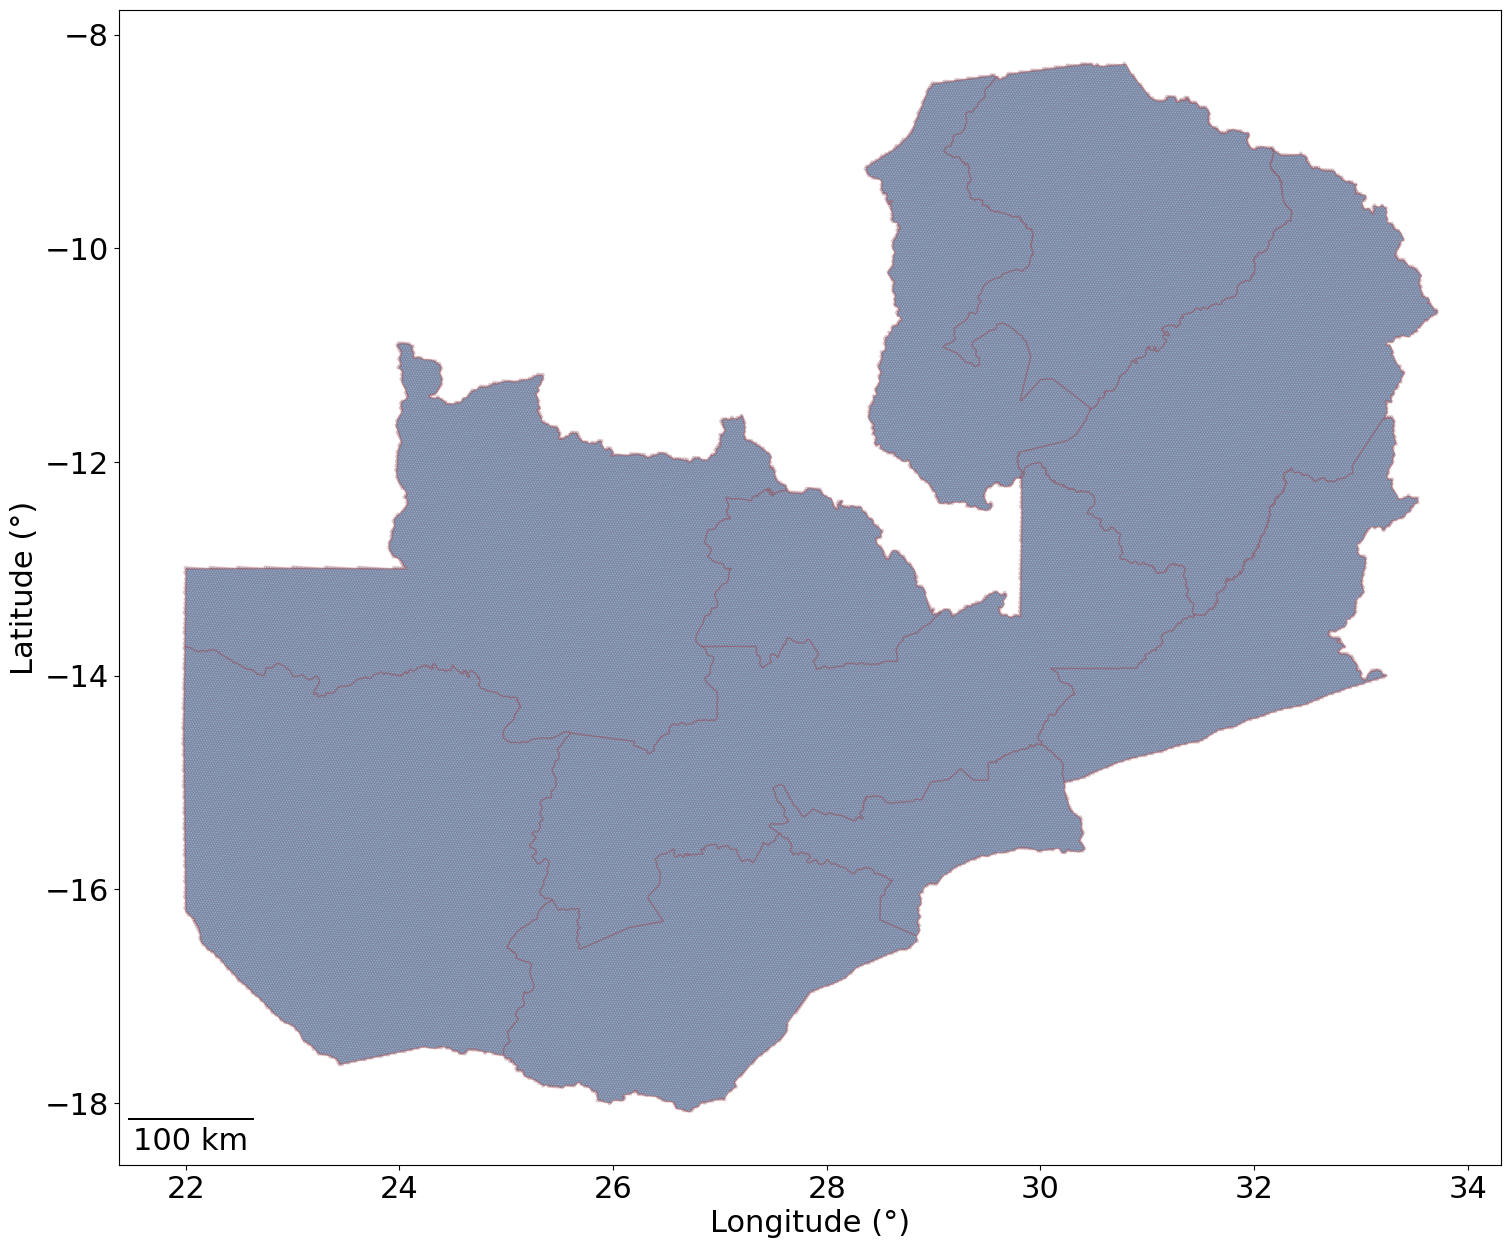

In [5]:
%run basegridhex.py

# Part 2. Extract GIS-based attributes

## Extract information from vector layers

In [6]:
regions, admin_gdf, region_gdf, grid = load_initial_data(config)

Loading initial data...
Admin boundaries loaded. Country GDF: (1, 3), Region GDF: (10, 12)
Hexagon grid loaded: (122901, 10)
Validating that all regions have cells in the pre-processed grid...
Validation successful: All target regions are present in the grid file.


In [7]:
# transmission lines
mv_lines_gdf = gpd.read_file(config.GRID_PATH / config.MV_LINES_SHP)
hv_lines_gdf = gpd.read_file(config.GRID_PATH / config.HV_LINES_SHP)

# Part 3. Constructing Multi-vector Demand

### Calculate Total Demand

**Demand = Residential + Commercial + Industrial **

where, 

**Residential** = No of HH with access X average en. cons. kWh/HH/year

**Commercial**  = Number of employee X average en. con. kWh/employee

**Industrial**  = Commodity Production (tonnes) from mines X average energy consumption per tonne

In [8]:
extracting_data = True

INFO: Successfully loaded configuration for Zambia from config.py.
Loading initial data...
Admin boundaries loaded. Country GDF: (1, 3), Region GDF: (10, 12)
Hexagon grid loaded: (122901, 10)
Validating that all regions have cells in the pre-processed grid...
Validation successful: All target regions are present in the grid file.
EPSG:4326
Extracting raster data...
EPSG:4326
Starting extraction: 2025-12-12 12:10:01.856838
Extraction done: 2025-12-12 12:15:34.320475
Processed WorldPop Buildings Count.
Starting extraction: 2025-12-12 12:15:34.322599
Extraction done: 2025-12-12 12:18:51.282912
Processed WorldPop Urban.
Starting extraction: 2025-12-12 12:18:51.283897
Extraction done: 2025-12-12 13:31:25.416795
Processed HREA Lighting.
Starting extraction: 2025-12-12 13:31:25.423683
Extraction done: 2025-12-12 13:33:06.037919
Processed Falchetta Tiers (Majority).
Starting extraction: 2025-12-12 13:33:06.040527
Extraction done: 2025-12-12 13:34:46.610775
Processed Falchetta Tiers (Mean).
Con

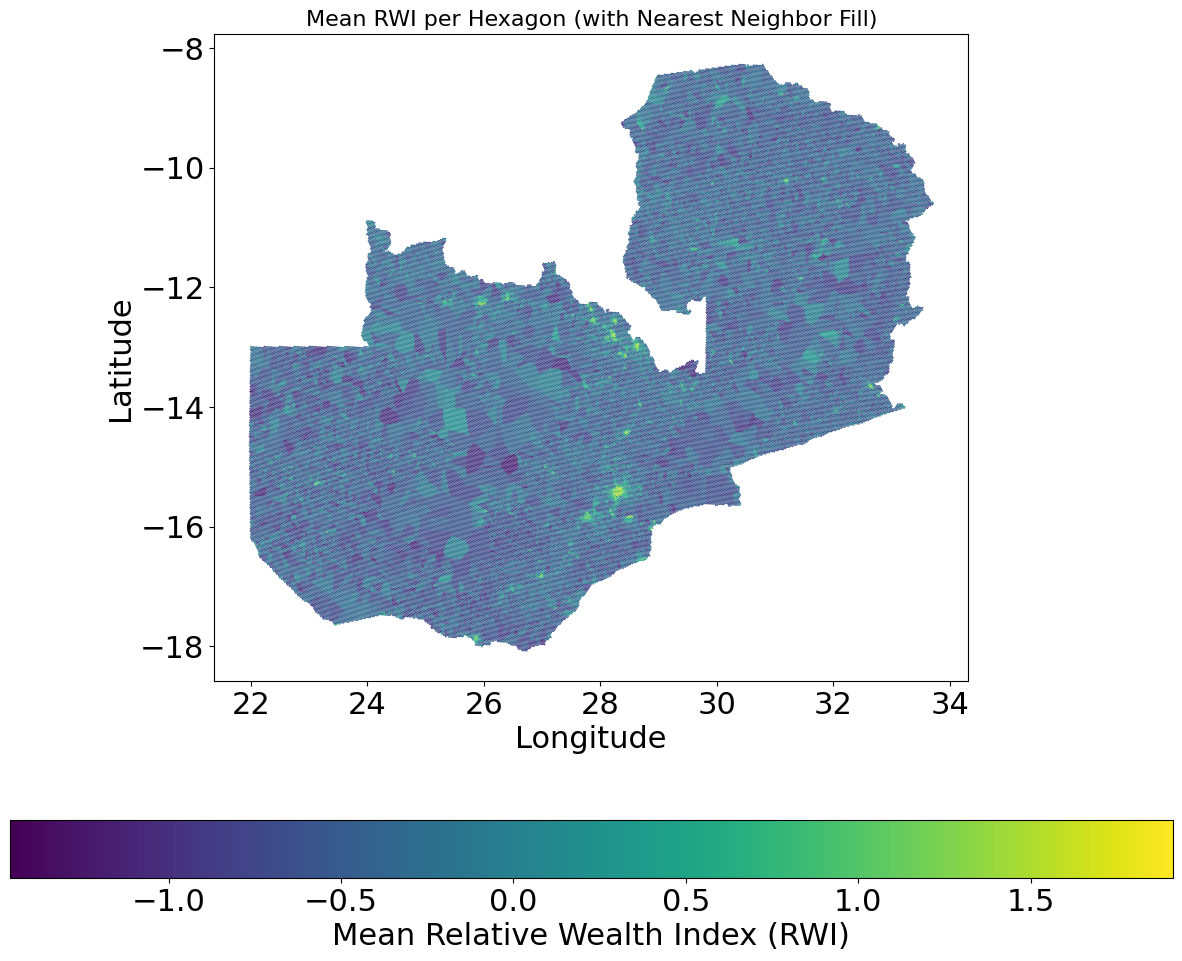

Loading UN energy balance statistics...
Total Residential electricity (UN Stats): 4022 GWh
Total Services electricity (UN Stats): 722 GWh
Loading census data...
Provincial census data loaded: (11, 11)
Plotting buildings map...


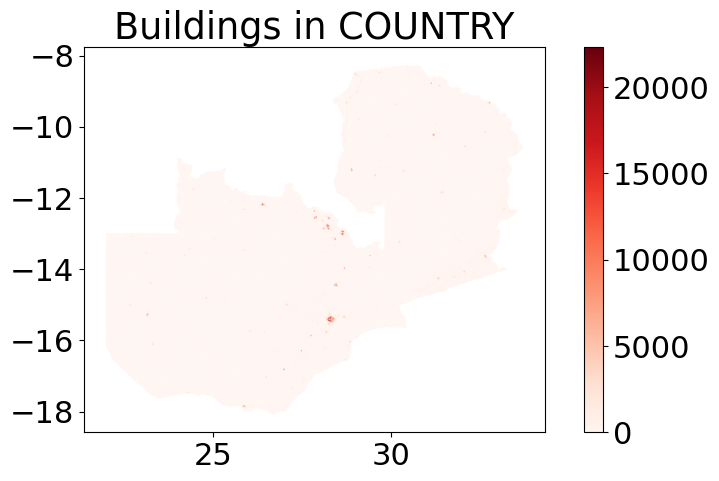

Total number of buildings: 8922145
Plotting HREA map...


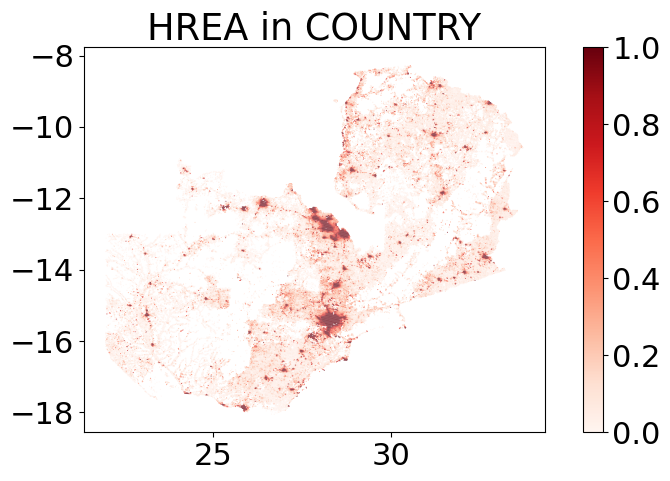

NaN values filled using nearest neighbor.
0
Determining location status (urban/rural)...
'location' column created. Counts: {'rural': 122216, 'urban': 685}
Plotting Urban/Rural map...


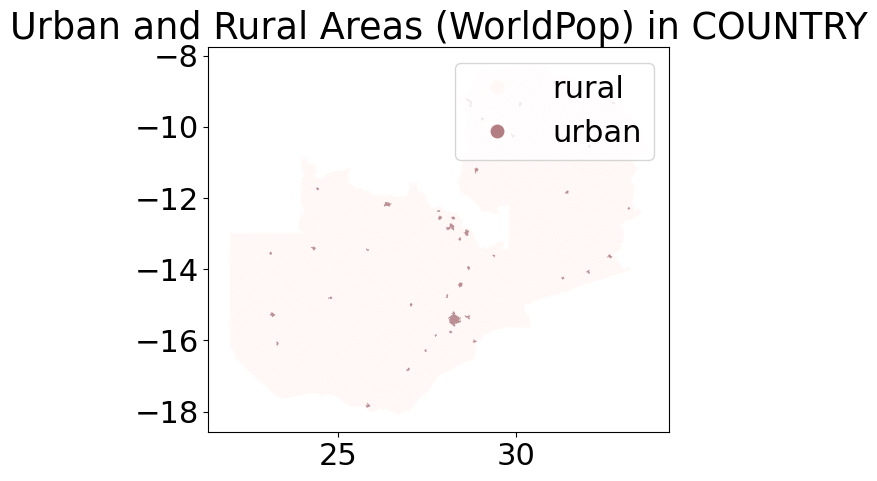

Determining electrification status...
--- Initial Data Sanity Check ---
Grid CRS: EPSG:4326 | Shape: (122901, 19)
Admin Boundary CRS: EPSG:4326 | Shape: (1, 3)
MV Lines CRS: EPSG:4326 | Shape: (64868, 49)
HV Lines CRS: EPSG:4326 | Shape: (931, 63)
Target CRS for all operations: EPSG:32735

--- Projecting all data to target CRS ---
Processing proximity for HV Lines with buffer 500m...
Processing proximity for MV Lines with buffer 500m...
Updated 'is_near_any_line' column. Current counts:
is_near_any_line
False    112043
True      10858
Name: count, dtype: int64
'status_electrified' column created. Counts: {'nonelec': 118702, 'elec': 4199}
Plotting Line Proximity map...


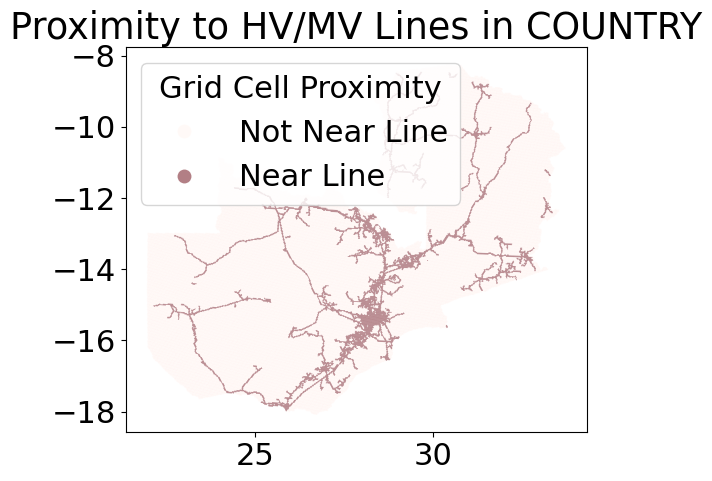

Calculating household numbers...
Total population calculated: 17,798,700
Finished calculating household numbers.
                HH_urban   HH_rural  size_HH_urban  size_HH_rural   HH_total  \
region                                                                         
Copperbelt    449,077.00  85,356.00           4.66           5.13 534,433.00   
Muchinga       24,953.00 151,730.00           4.30           4.73 176,683.00   
North-Western  91,501.00 116,233.00           5.03           5.53 207,734.00   

               totalBuildings  urbanBuildings  ruralBuildings  \
region                                                          
Copperbelt       1,013,514.90      556,480.38      457,034.52   
Muchinga           558,966.21       72,558.00      486,408.21   
North-Western      510,596.69      138,291.26      372,305.43   

               shareRuralBuild  shareUrbanBuild  shareUrbanResBui  \
region                                                              
Copperbelt            

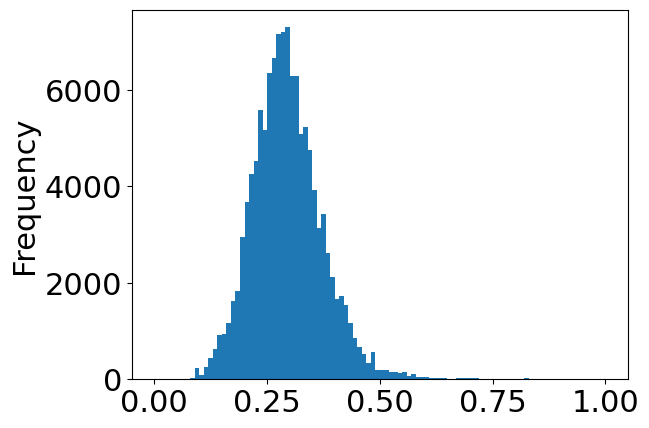

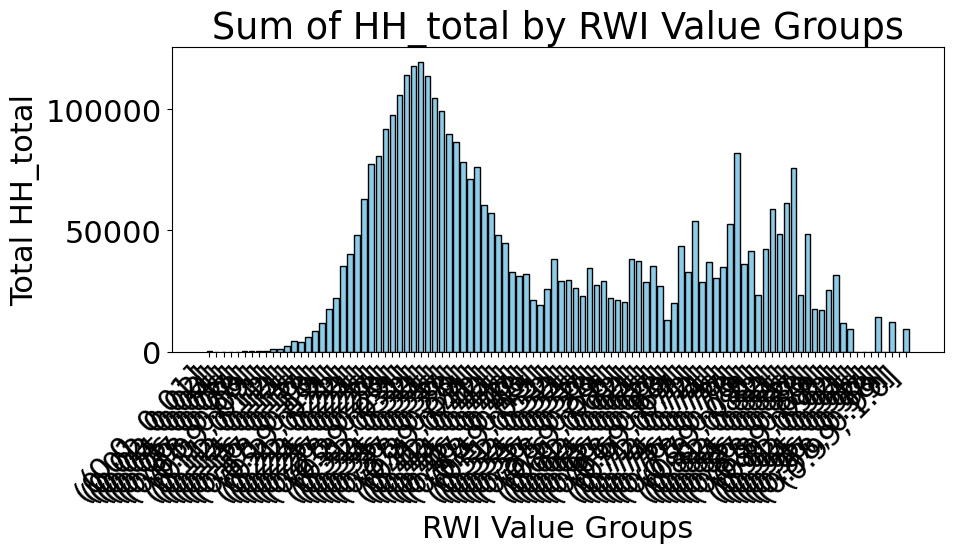

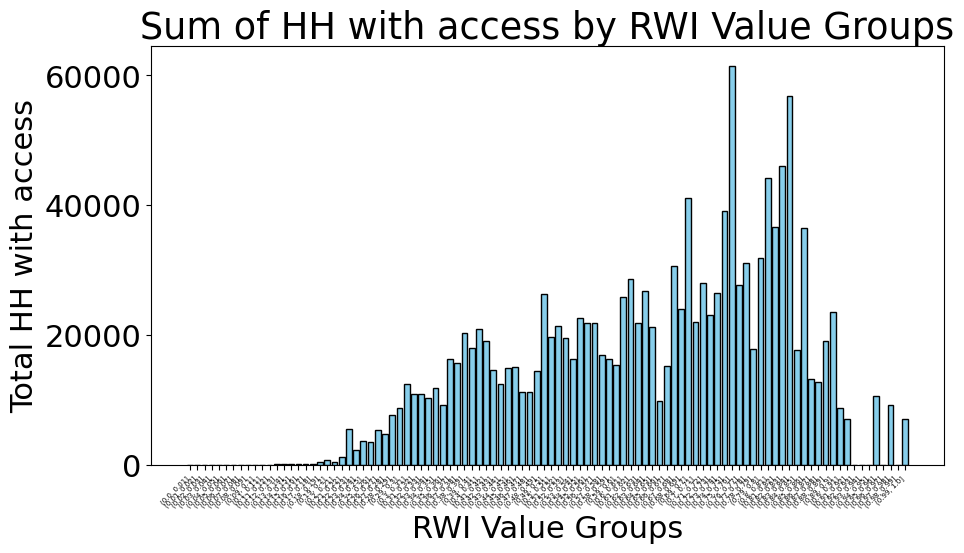

Calculating energy per HH (Method 1: RWI-logistic)...
Solved k for logistic function: 17.7945
Finished calculating energy per HH (Method 1).


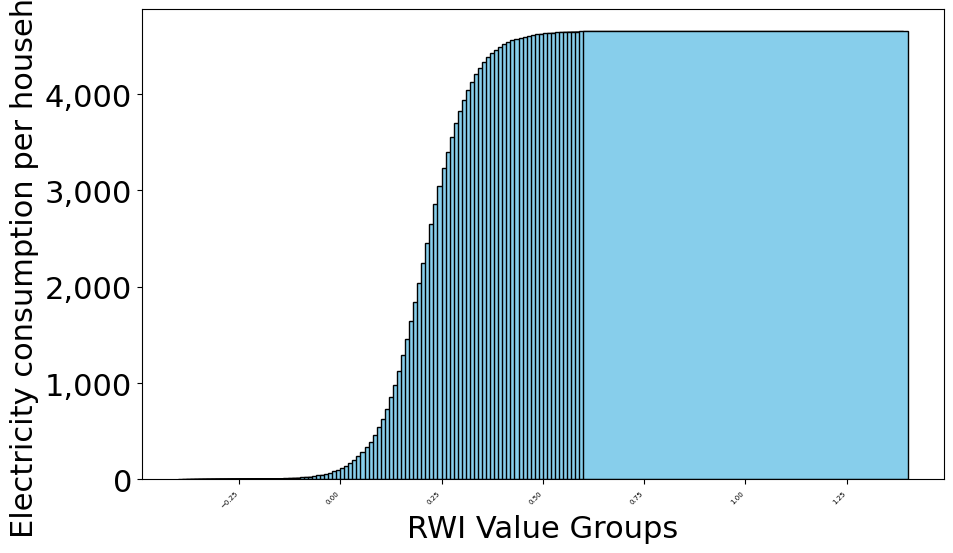

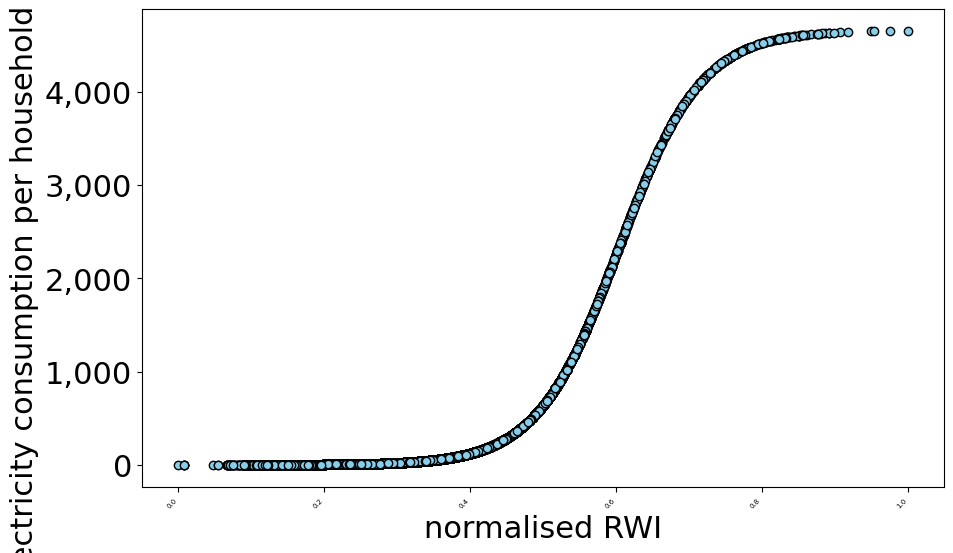

Read data on 12831 survey households
Estimating average energy use per household...
Tier 1 (Electricity,Mobile telephone,Radio) = 11.4 kWh/y
Tier 2 (Television) = 294.8 kWh/y
Tier 3 (Microwave,Washing machine,Computer) = 691.8 kWh/y
Tier 4 (Refrigerator) = 2,258.2 kWh/y
Tier 5 (Air conditioner) = 6,055.1 kWh/y

Applying flexible override rules to adjust tiers...
Updated 598 households to Tier 5 based on rule: 'Has car/truck' is 'yes'
Updated 3 households to Tier 4 based on rule: 'Source of drinking water' is 'bottled water'
Updated 63 households to Tier 4 based on rule: 'Source of drinking water' is 'piped into dwelling'
Updated 104 households to Tier 3 based on rule: 'Type of toilet facility' is 'flush to septic tank'
Updated 70 households to Tier 3 based on rule: 'Type of toilet facility' is 'flush to piped sewer system'
Updated 22 households to Tier 3 based on rule: 'Has motorcycle/scooter' is 'yes'
Written energy use estimates to C:\Users\amillot\PycharmProjects\EDeMOS\Buildings\Da

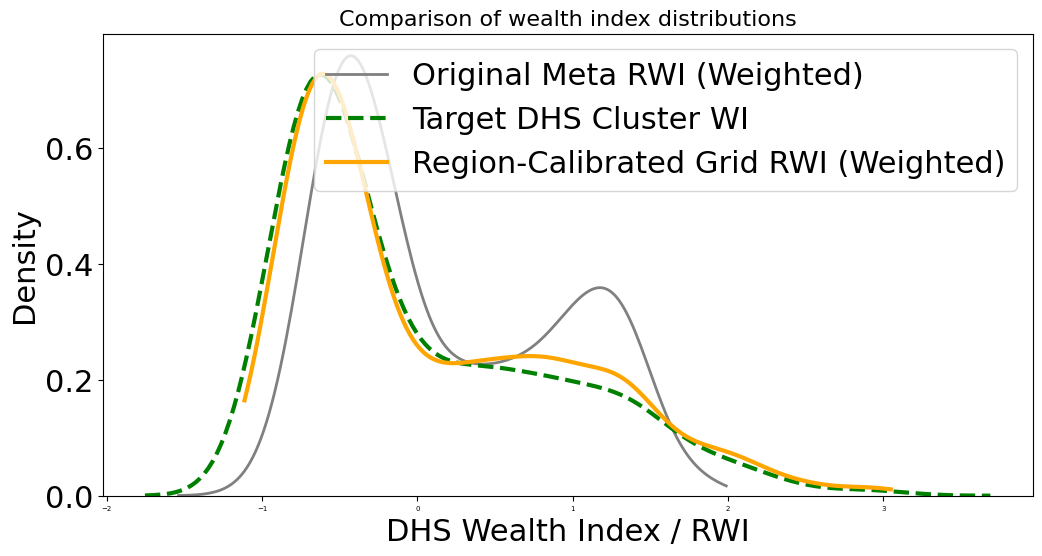


--- 4. Training Models and Predicting Consumption ---
--- Processing Urban Subset ---
--- Processing Rural Subset ---

--- 5. Final Results ---
Prediction complete. Total predicted consumption for the country: 2,802.23 GWh
  - Urban: 2,281.60 GWh
  - Rural: 520.63 GWh
Calculating total residential energy and scaling...
Method meth1: Total Assessed = 4022.50 GWh, UN Stats = 4022.50 GWh, Scaling Factor = 1.0000
Method meth2: Total Assessed = 2802.23 GWh, UN Stats = 4022.50 GWh, Scaling Factor = 1.4355

Summary of energy consumption before scaling (GWh):
                 meth1  meth2
NAME_1                       
Central         195.99 223.34
Copperbelt    1,312.12 704.94
Eastern         163.03 175.37
Luapula          57.37 141.55
Lusaka        1,507.06 925.51
Muchinga         25.82  31.16
North-Western   153.88 128.16
Northern        145.03 105.59
Southern        358.64 268.94
Western         103.58  97.69

Summary of energy consumption after scaling (GWh):
                 meth1    met

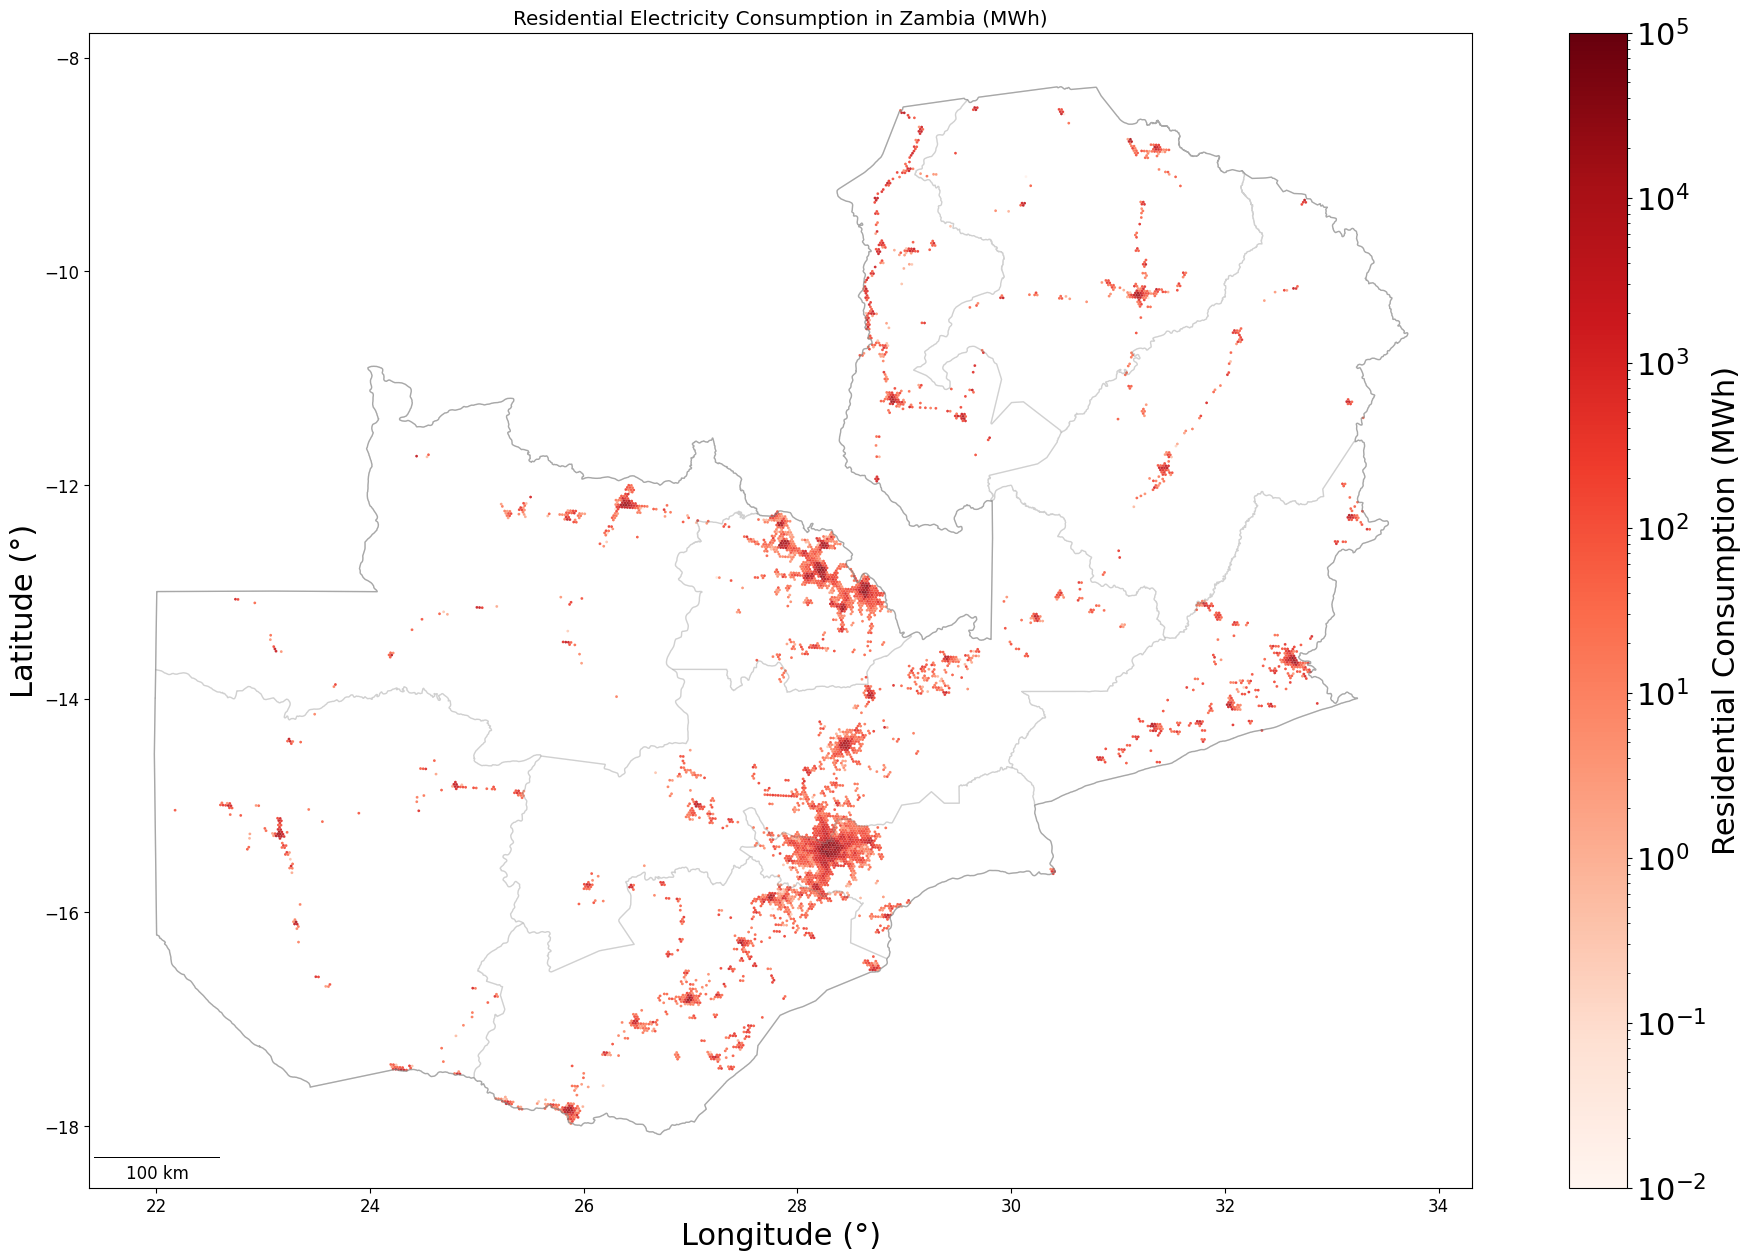

Calculating services electricity (building-based)...
Total services buildings with estimated access: 1,918,367
Service electricity per accessible building: 376 kWh/building
Finished calculating services electricity (building-based).
Calculating services energy (employee-based)...
  Calculating number of men and women (15-49)...
  Calculating number of working men and women...
Total employees with access: 1,936,500
Service electricity per accessible employee: 372.67 kWh/employee
Finished calculating services energy (employee-based).
Plotting Services Consumption map...


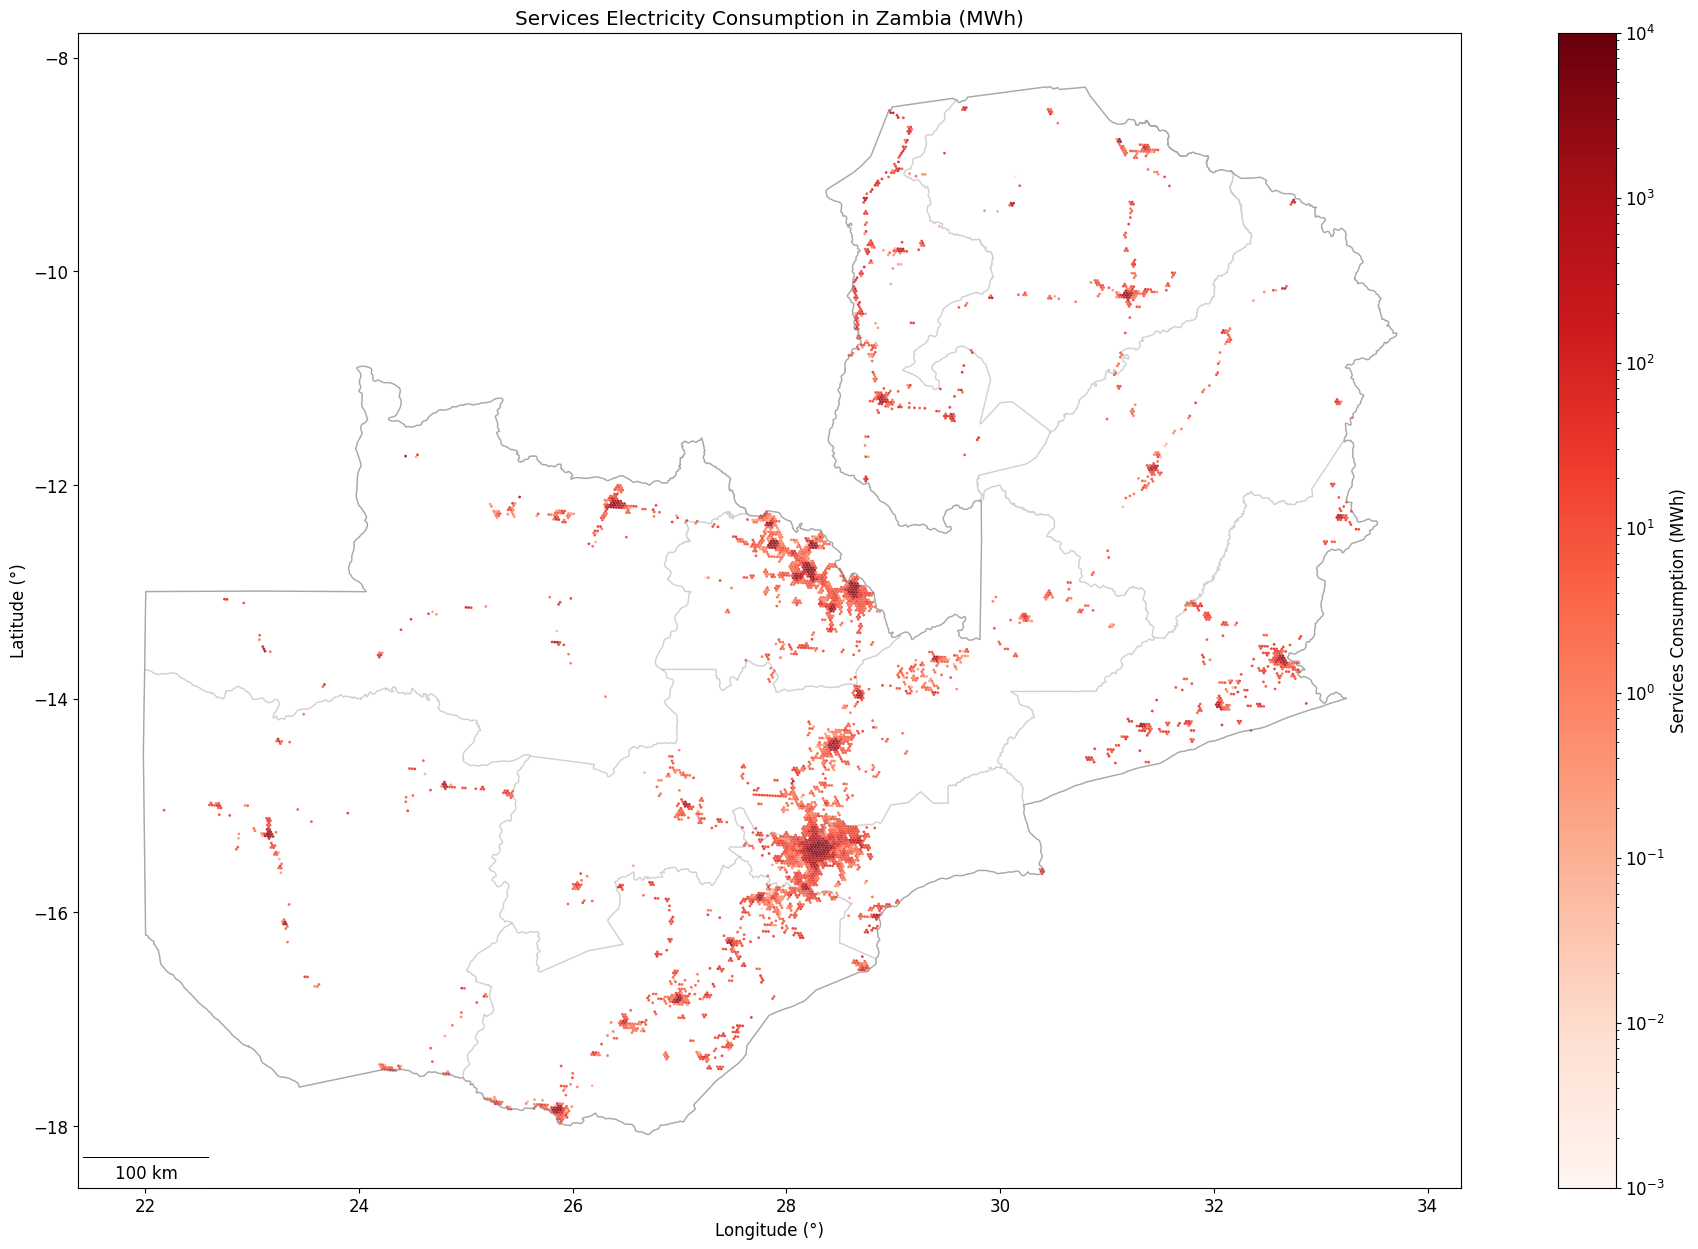

Services electricity consumption assessed after scaling:
Central: 52 GWh
Copperbelt: 201 GWh
Eastern: 42 GWh
Luapula: 25 GWh
Lusaka: 241 GWh
Muchinga: 7 GWh
North-Western: 37 GWh
Northern: 25 GWh
Southern: 65 GWh
Western: 26 GWh
Buildings electricity consumption assessed after scaling:
Central 372,749,083 GWh
Copperbelt 1,213,234,057 GWh
Eastern 293,738,788 GWh
Luapula 227,960,865 GWh
Lusaka 1,570,021,824 GWh
Muchinga 51,637,048 GWh
North-Western 220,794,967 GWh
Northern 176,801,447 GWh
Southern 451,319,006 GWh
Western 165,909,582 GWh


In [9]:
%run Buildings/building_demand.ipynb

In [10]:
total_residential_electricity_assessed = grid[config.COL_RES_ELEC_KWH_METH2].sum()
print("residential electricity consumption:", f"{total_residential_electricity_assessed/10**6:,.0f}","GWh") # GWh

residential electricity consumption: 2,802 GWh


Loading initial data...
Admin boundaries loaded. Country GDF: (1, 3), Region GDF: (10, 12)
Hexagon grid loaded: (122901, 10)
USGS Targets for 2019 -> Ore: 799,900, Metal: 782,900
Loaded 2 known production values from Additional Info.
Production at a site  Fitwaola Open Pit Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Fitwaola Open Pit Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mkushi Heap Leach  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mufulira West Heap-Leach Facility  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Sentinel Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  TD3a, TD3b, TD5, and TD7 Ta

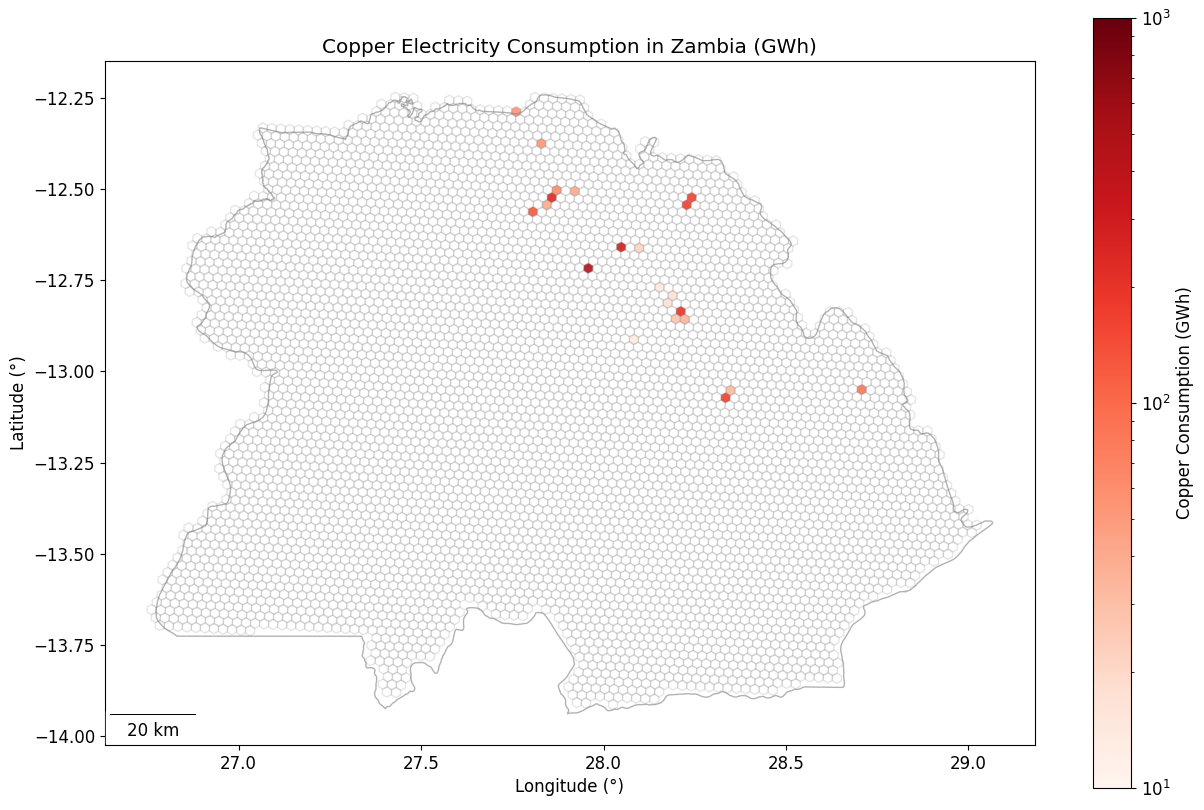

Plotting Copper Region Consumption map...


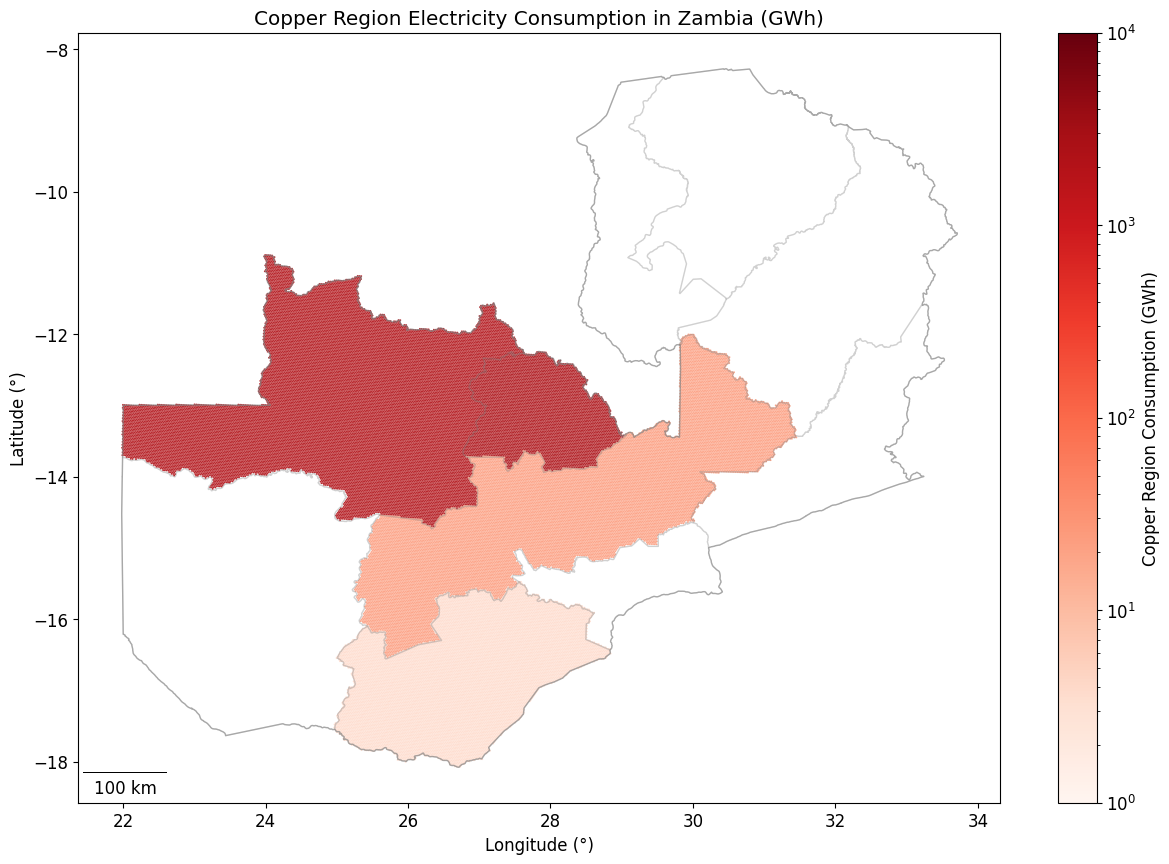

Plotting Industry Consumption map...


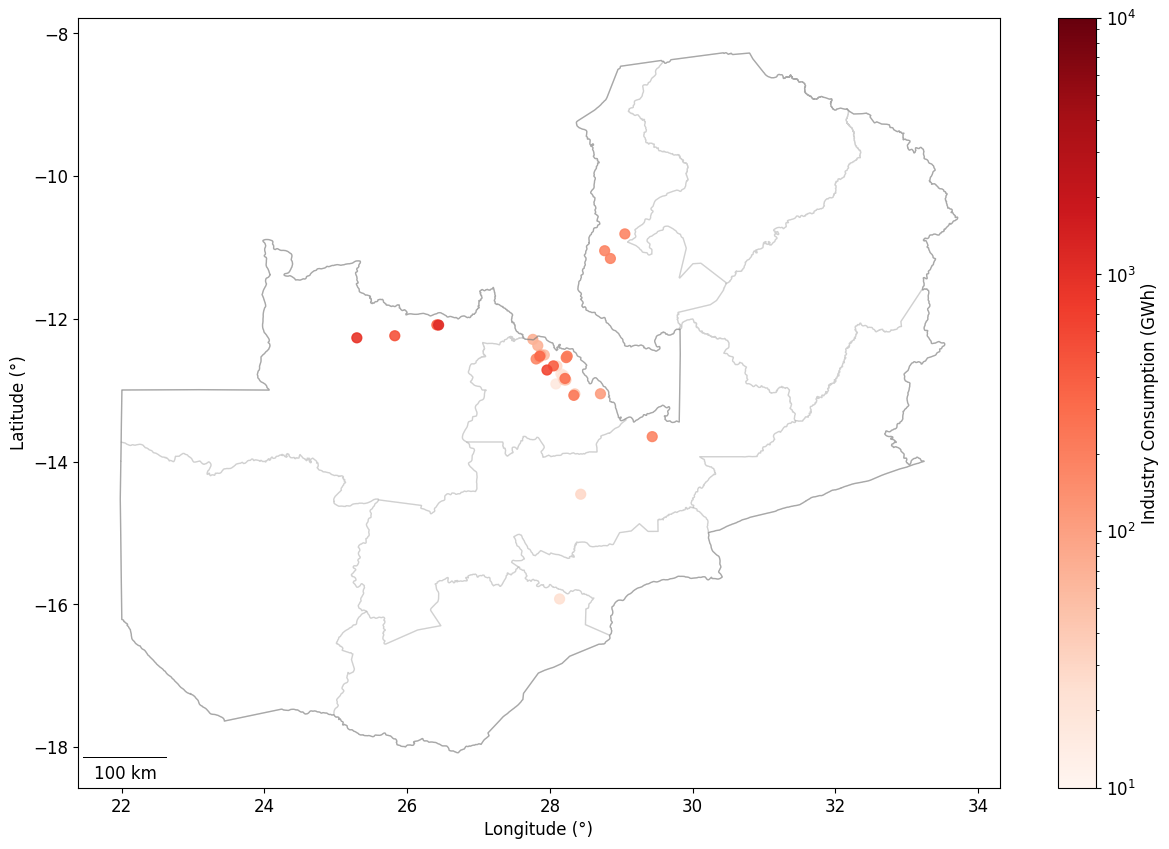

Share of Industrial Electricity Consumption by Process Step
(Total Modeled: 5.23 TWh)


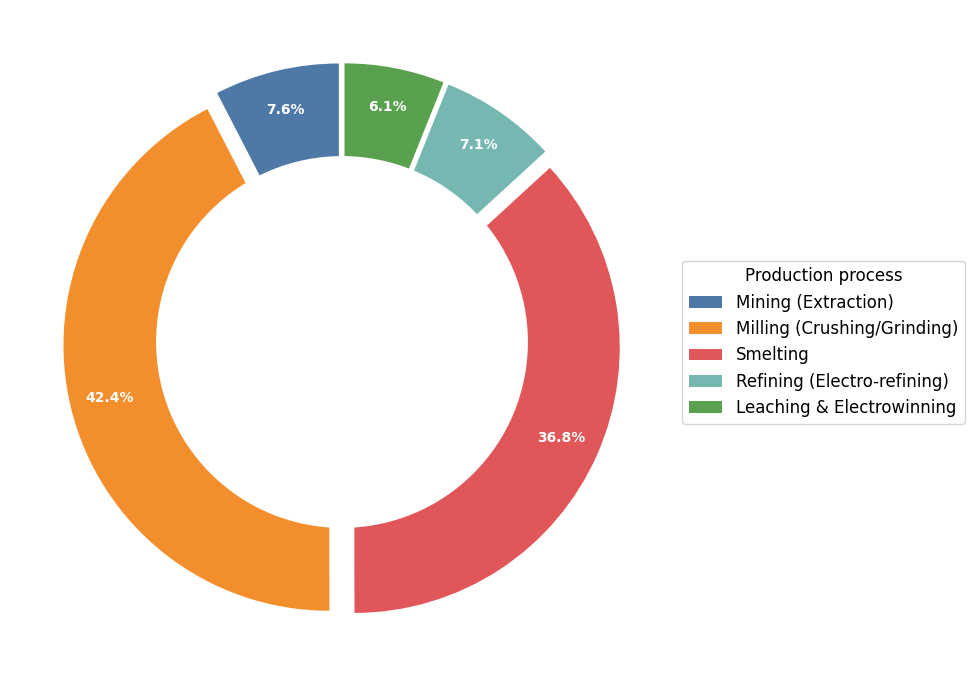

Industry electricity consumption in COUNTRY 5.2 TWh


In [11]:
%run Industry/industry_demand.ipynb
total_industry_electricity_beforescaling_tj = grid[config.COL_IND_ELEC_TJ].sum()
print("Industry electricity consumption in",f"{area}",f"{total_industry_electricity_beforescaling_tj/3600:,.1f}", "TWh")

In [12]:
# Concatenate results
out_path = config.OUTPUT_DIR
grid_buildings = gpd.read_file(config.BUILDINGS_GPKG_FILE) # contains services and residential data
grid_industry = gpd.read_file(config.INDUSTRY_GPKG_FILE)

grid = grid_buildings.copy()
grid = grid.merge(grid_industry, on='id', suffixes=('', '_y'))
grid.drop(grid.filter(regex='_y$').columns, axis=1, inplace=True)
grid.head(2)

h3_index     n0     n1          n2           n3          n4  \
0  879631111ffffff  52288  53224 69,625.0000  46,655.0000 62,631.0000   
1  87960c686ffffff  84902  50741  6,756.0000 113,158.0000 33,704.0000   

           n5         NAME_1  id  buildingssum  ...  nb_men_working  \
0 94,887.0000        Eastern   1      142.2604  ...         11.8597   
1 24,479.0000  North-Western   2        0.0000  ...          0.0000   

   total_employee  total_employee_withaccess  ser_elec_kWh_emp  \
0         17.6502                     0.0000            0.0000   
1          0.0000                     0.0000            0.0000   

   SElec_kWh_weighted  ser_elec_kWh_final  \
0              0.0000              0.0000   
1              0.0000              0.0000   

                                            geometry ind_elec_TJ  \
0  POLYGON ((30.91077 -14.45655, 30.89803 -14.462...         NaN   
1  POLYGON ((26.67134 -12.52555, 26.65859 -12.531...         NaN   

   copper_elec_TJ ind_elec_scaled_TJ  
0             NaN                NaN  
1             NaN                NaN  

[2 rows x 75 columns]

In [13]:
# Units
grid[config.COL_IND_ELEC_GWH]=grid[config.COL_IND_ELEC_SCALED_TJ]/3.6
grid[config.COL_IND_ELEC_KWH]=grid[config.COL_IND_ELEC_GWH] * 10**6
total_ind_electricity_gwh = grid[config.COL_IND_ELEC_GWH].sum()
print(f"Industry: {total_ind_electricity_gwh:,.0f}", "GWh")
grid[config.COL_RES_ELEC_KWH_FINAL] = grid[config.COL_RES_ELEC_KWH_METH2_SCALED]
total_res_electricity_gwh = grid[config.COL_RES_ELEC_KWH_FINAL].sum() / 10**6
print(f"Residential: {total_res_electricity_gwh:,.0f}", "GWh")
total_ser_electricity_gwh = grid[config.COL_SER_ELEC_KWH_FINAL].sum() / 10**6
print(f"Services: {total_ser_electricity_gwh:,.0f}", "GWh")
grid[config.COL_BUI_ELEC_KWH_FINAL]=grid[config.COL_RES_ELEC_KWH_FINAL]+grid[config.COL_SER_ELEC_KWH_FINAL]

Industry: 6,588 GWh
Residential: 4,023 GWh
Services: 722 GWh


In [14]:
grid[config.COL_TOTAL_ELEC_KWH] = grid.apply(lambda row: (np.nansum([row[config.COL_RES_ELEC_KWH_FINAL], 
                                          row[config.COL_SER_ELEC_KWH_FINAL],  
                                             row[config.COL_IND_ELEC_KWH]
                                                     ])), axis=1)
total_elec_gwh = grid[config.COL_TOTAL_ELEC_KWH].sum() / 10**6
print("total electricity consumption:", f"{total_elec_gwh:,.0f}","GWh") 

total electricity consumption: 11,332 GWh


### Export result

In [15]:
grid.to_file(config.TOTAL_ELECTRICITY_GPKG_FILE, driver="GPKG", index=False, engine='fiona')

## Print maps for quick assessment

### Total demand map

Plotting Total Consumption map...


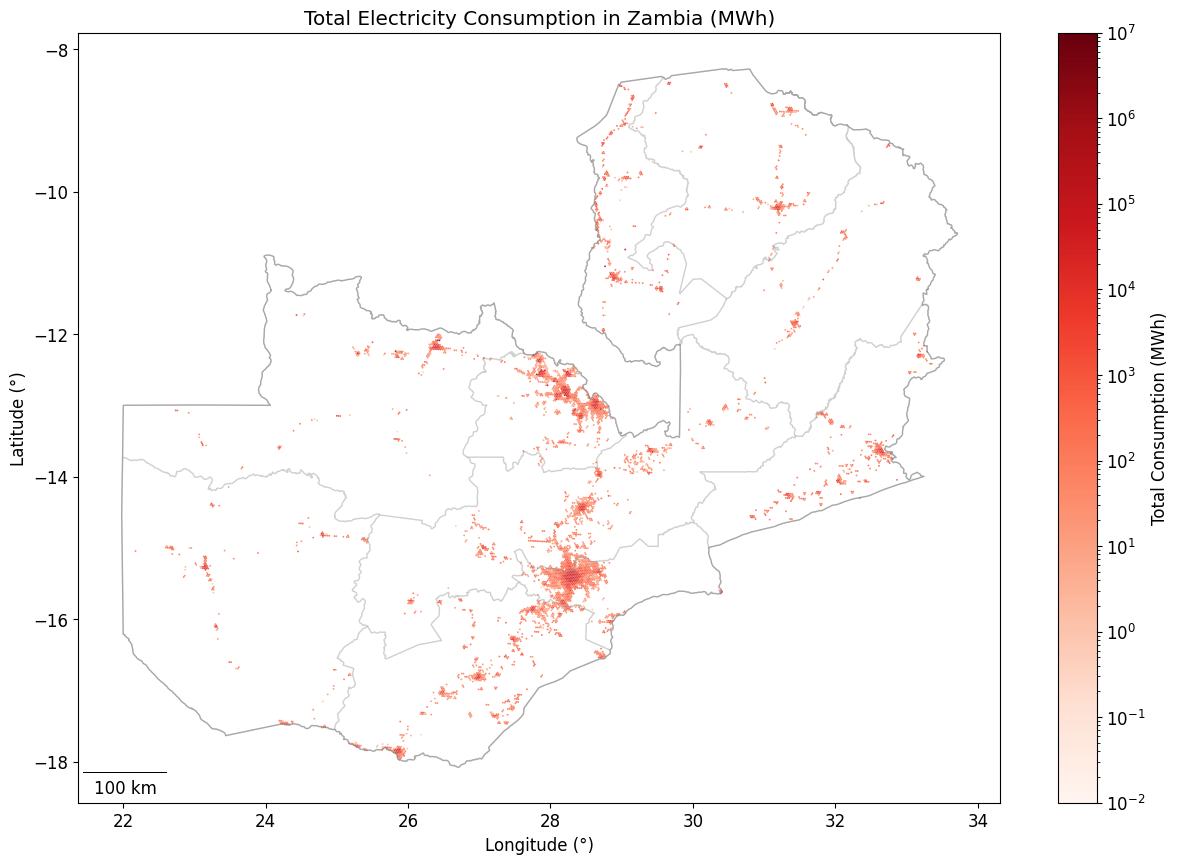

In [16]:
plot_sector_consumption_map(grid, config.COL_TOTAL_ELEC_KWH, config, admin_gdf, region_gdf, 'Total',
                           fig_size=(15, 10))

### Residential map

Plotting Residential Consumption map...


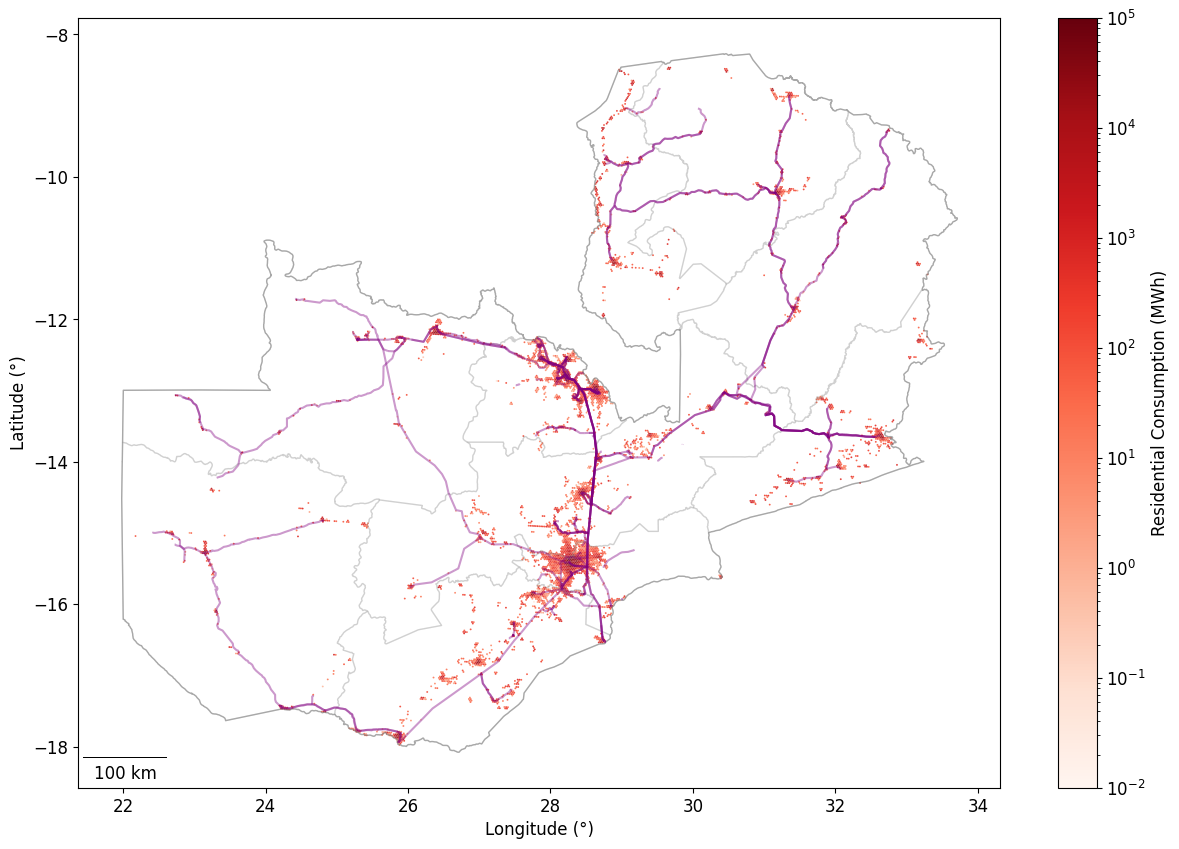

In [17]:
plot_sector_consumption_map(grid, config.COL_RES_ELEC_KWH_FINAL, config, admin_gdf, region_gdf, 'Residential', lines_gdf=hv_lines_gdf, 
                           fig_size=(15, 10), title = False)

In [18]:
def plot_hh_consumption_map(grid_gdf, col_to_plot, app_config, admin_gdf_param, region_gdf_param, sector_name,
                           lines_gdf=None, fig_size=(25, 15), title = True):
    print(f"Plotting {sector_name} Consumption map...")

    if col_to_plot not in grid_gdf.columns:
        print(f"Warning: Column '{col_to_plot}' not found for {sector_name} Consumption map.")
        return

    grid_display = grid_gdf.copy()
    grid_display = grid_display[grid_display[config.COL_HH_WITH_ACCESS] > 0]
    
    col_lower = col_to_plot.lower()
    if 'gwh' in col_lower:
        unit_label = 'GWh'
    elif 'kwh' in col_lower:
        # grid_display[col_to_plot] = grid_display[col_to_plot] / 10**3 # kWh to MWh for display
        unit_label = 'kWh'
        max_value = 1e6
        min_value = 1e-3
    else:
        print(f"Warning: Could not detect a known unit (kWh, MWh, GWh) in column name '{col_to_plot}'. Plotting raw values.")

    fig, ax = plt.subplots(figsize=fig_size)
    ax.set_xlabel('Longitude (°)')
    ax.set_ylabel('Latitude (°)')

    v_max = grid_display[col_to_plot].max() if not grid_display[col_to_plot].empty else 1e6
    # v_min = grid_display[col_to_plot].min() if not grid_display[col_to_plot].empty else 1e-3
    # if v_min <= 0 : v_min = 1e-9
    # Create a series of only the positive values from the column
    positive_values = grid_display[col_to_plot][grid_display[col_to_plot] > 0]
    # If there are any positive values, find the minimum. Otherwise, use a default small number.
    v_min = positive_values.min() if not positive_values.empty else 1e-3

    grid_display.sort_values(col_to_plot, ascending=True).plot(
        ax=ax, column=col_to_plot, cmap="Reds", legend=True, alpha=0.9,
        # norm=colors.Colormap(vmin=v_min, vmax=v_max),
        legend_kwds={"label": sector_name + " Consumption (" + unit_label + " per cell)"})

    if admin_gdf_param is not None: admin_gdf_param.to_crs(grid_gdf.crs).plot(ax=ax, edgecolor='brown', facecolor='None', alpha=0.6)
    if region_gdf_param is not None: region_gdf_param.to_crs(grid_gdf.crs).plot(ax=ax, edgecolor='brown', facecolor='None', alpha=0.2)
    if lines_gdf is not None:
        lines_gdf = lines_gdf.to_crs(admin_gdf_param.crs)
        lines_gdf = gpd.clip(lines_gdf, admin_gdf_param)
        lines_gdf.plot(ax=ax, edgecolor='purple', color='purple', alpha=0.4)

    ax.set_aspect('equal', 'box')
    plt.rcParams.update({'font.size': 12})
    ax.tick_params(axis='both', which='major', labelsize=12)
    if app_config.AREA_OF_INTEREST == 'COUNTRY':
        region_title = app_config.COUNTRY
    else:
        region_title = app_config.AREA_OF_INTEREST
    if title:
        ax.set_title(f'{sector_name} Electricity Consumption in {region_title} ({unit_label})')

    # Scalebar
    points = gpd.GeoSeries([Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=app_config.CRS_WGS84)  # Geographic WGS 84 - degrees
    points = points.to_crs(32619)  # Projected WGS 84 - meters
    distance_meters = points[0].distance(points[1])
    # distance_meters = points.iloc[0].distance(points.iloc[1])
    scalebar = ScaleBar(distance_meters, dimension="si-length", location='lower left', length_fraction=0.1, width_fraction=0.001, units='m', color='black')
    ax.add_artist(scalebar)

    plt.savefig(app_config.OUTPUT_DIR / f'map_{sector_name}_demand_log_{app_config.COUNTRY}.png', bbox_inches='tight')

Plotting Households Consumption map...


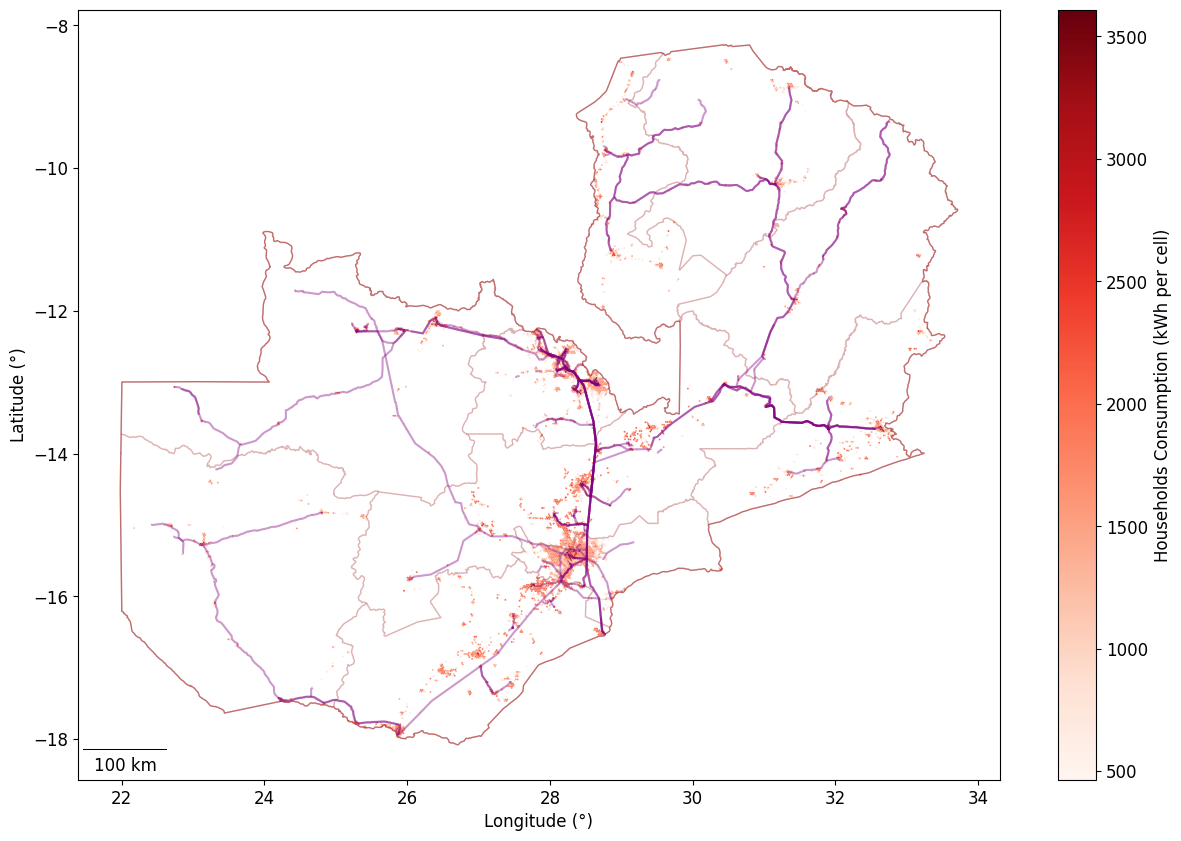

In [19]:
plot_hh_consumption_map(grid, config.COL_RES_ELEC_PER_HH_KWH_DHS, config, admin_gdf, region_gdf, 'Households', lines_gdf=hv_lines_gdf, 
                           fig_size=(15, 10), title = False)

### Services map

Plotting Services Consumption map...


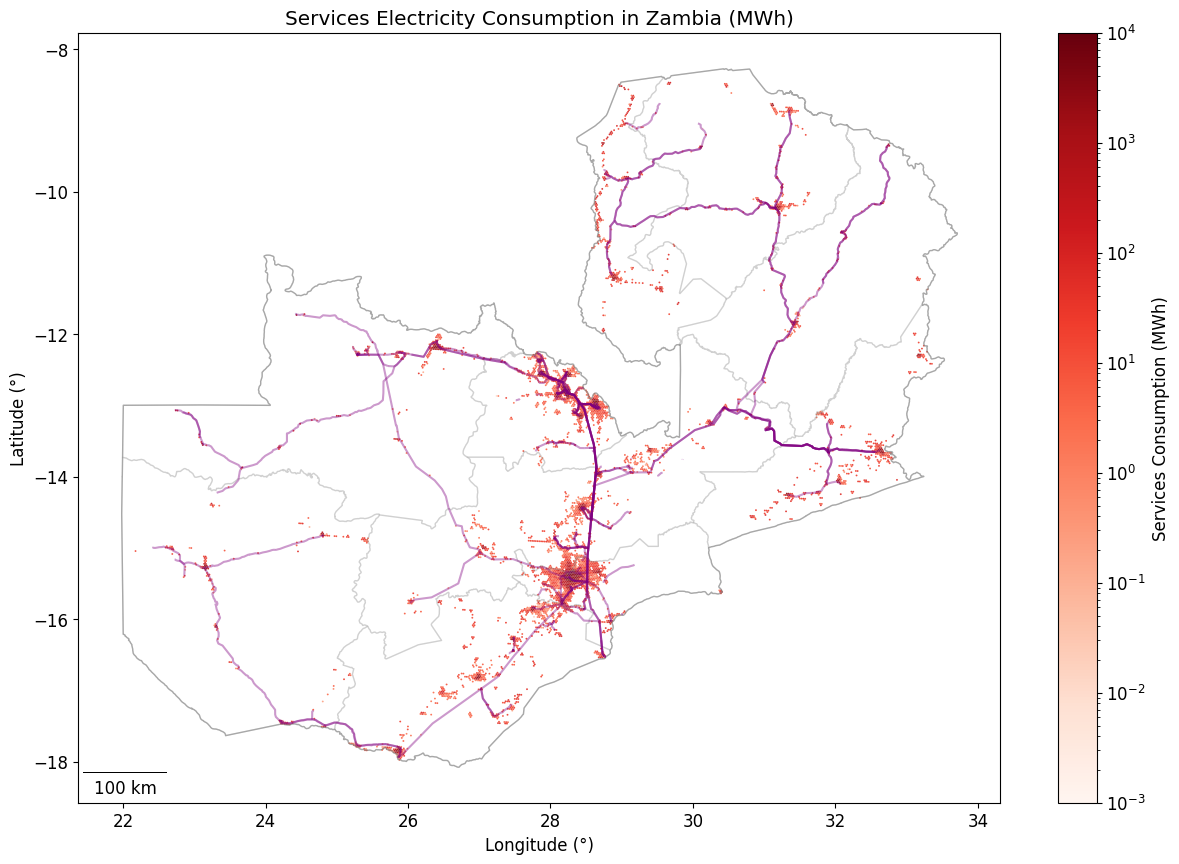

In [20]:
plot_sector_consumption_map(grid, config.COL_SER_ELEC_KWH_FINAL, config, admin_gdf, region_gdf, 'Services', lines_gdf=hv_lines_gdf, 
                           fig_size=(15, 10))

### Buildings map

Plotting Buildings Consumption map...


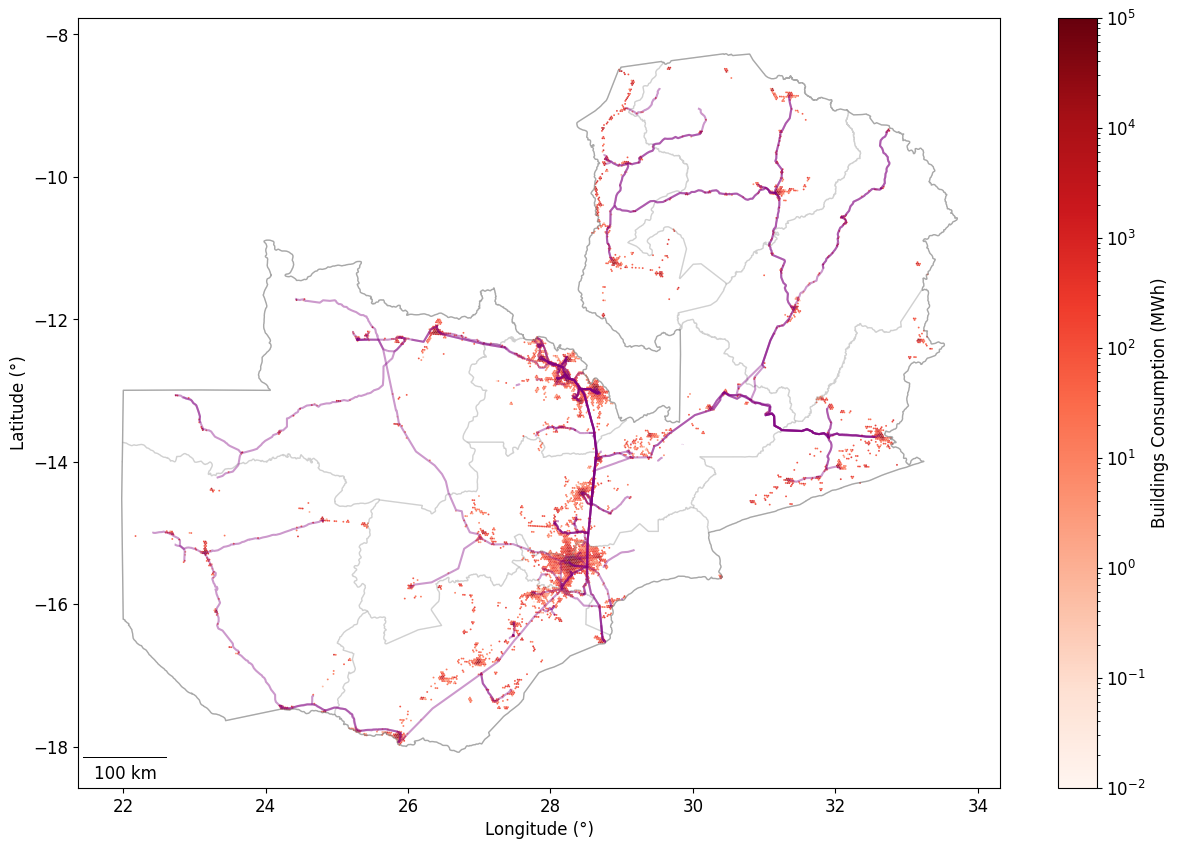

In [21]:
plot_sector_consumption_map(grid, config.COL_BUI_ELEC_KWH_FINAL, config, admin_gdf, region_gdf,  'Buildings', lines_gdf=hv_lines_gdf,
                           fig_size=(15, 10),title = False)

Plotting Buildings Consumption map...


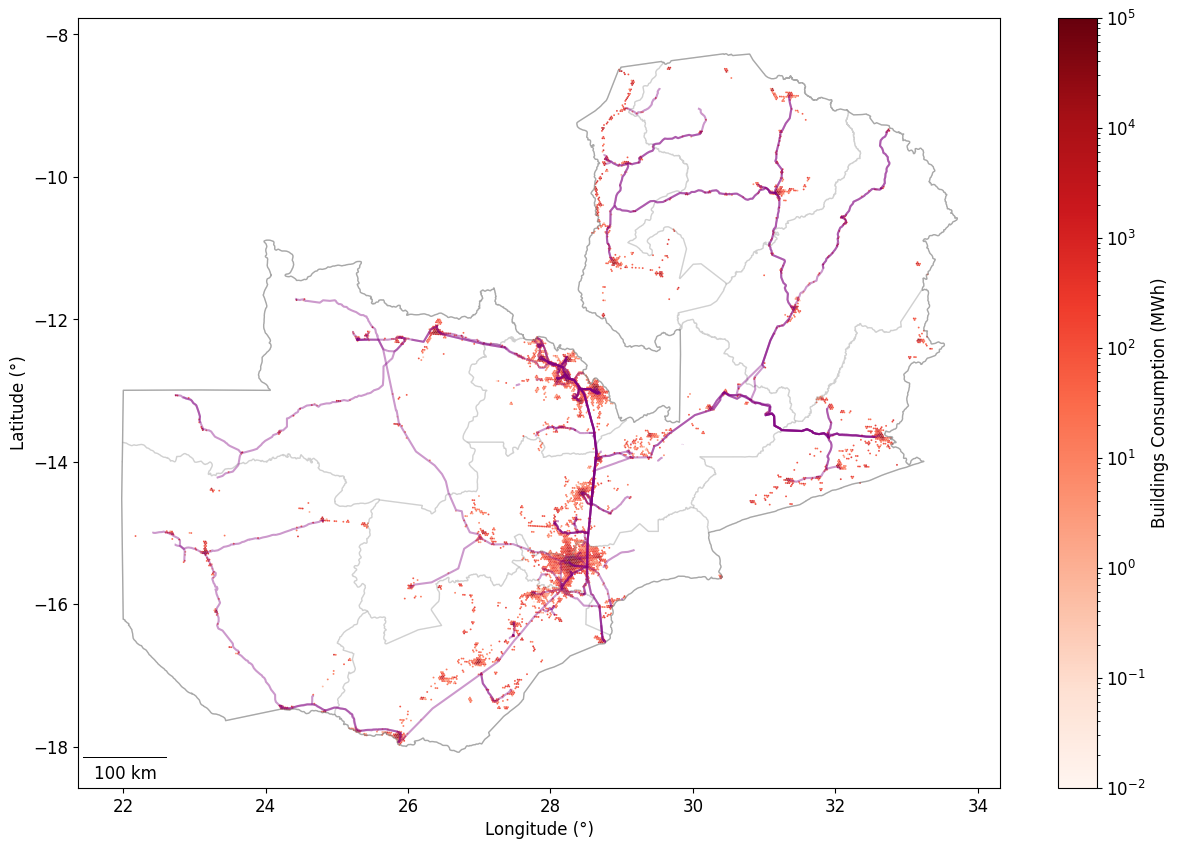

In [22]:
plot_sector_consumption_map(grid, config.COL_BUI_ELEC_KWH_FINAL, config, admin_gdf, region_gdf,  'Buildings', lines_gdf=hv_lines_gdf,
                           fig_size=(15, 10),title = False)

### Industry map

Plotting Industry Consumption map...


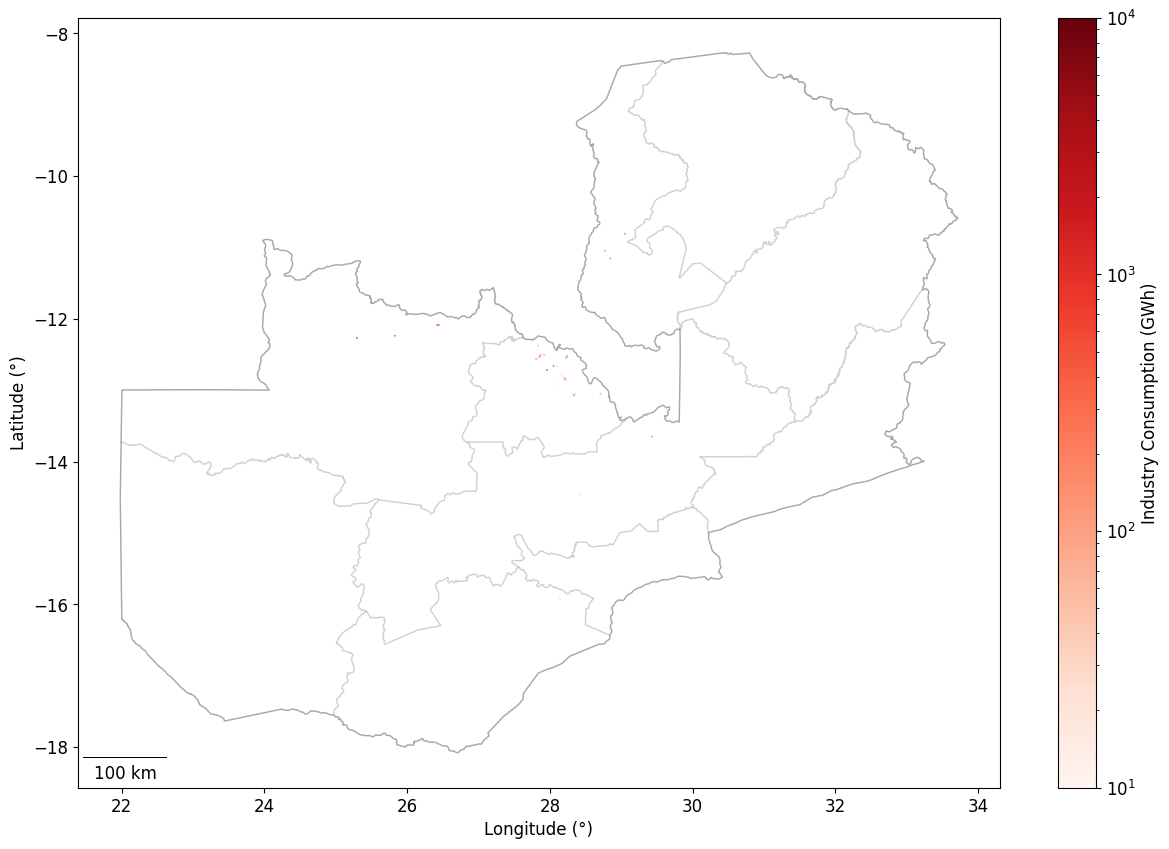

In [23]:
plot_sector_consumption_map(grid, config.COL_IND_ELEC_GWH, config, admin_gdf, region_gdf, 'Industry', lines_gdf=None, 
                           fig_size=(15, 10), title = False)

In [24]:
total_industry_elec_perregion_gwh=grid.groupby(config.COL_ADMIN_NAME)[config.COL_IND_ELEC_GWH].sum()
total_industry_elec_perregion_gwh

NAME_1
Central           206.4333
Copperbelt      3,019.1396
Eastern             0.0000
Luapula           534.4900
Lusaka              0.0000
Muchinga            0.0000
North-Western   2,803.9931
Northern            0.0000
Southern           23.4440
Western             0.0000
Name: ind_elec_GWh, dtype: float64

In [25]:
grid['total_industry_elec_perregion_gwh'] = grid[config.COL_ADMIN_NAME].map(total_industry_elec_perregion_gwh)

Plotting Industry Region Consumption map...


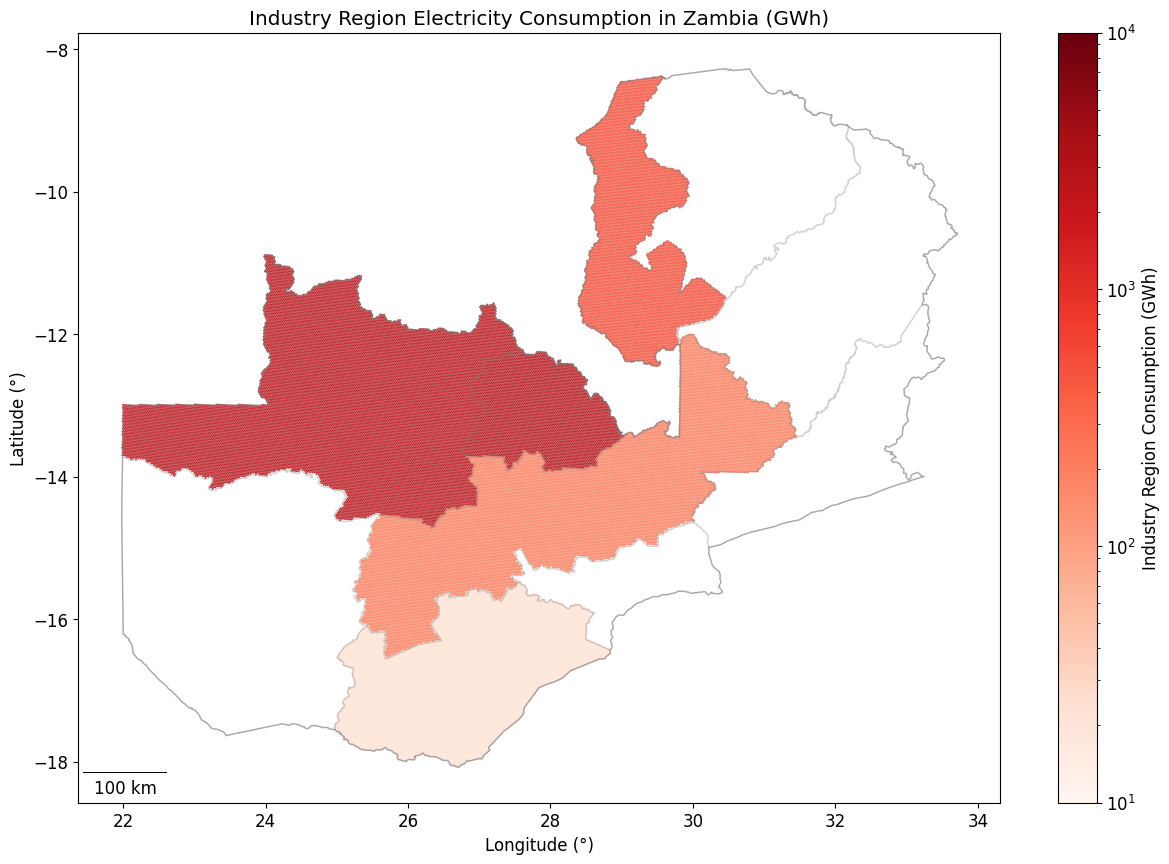

In [26]:
plot_sector_consumption_map(grid, 'total_industry_elec_perregion_gwh', config, admin_gdf, region_gdf, 'Industry Region', lines_gdf=None, 
                           fig_size=(15, 10))